### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras as keras

Using TensorFlow backend.


In [4]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()

In [5]:
print("xtrain shape:", xtrain.shape, "ytrain shape:", ytrain.shape)

xtrain shape: (60000, 28, 28) ytrain shape: (60000,)


In [6]:
print("xtest shape:", xtest.shape, "ytest shape:", ytest.shape)

xtest shape: (10000, 28, 28) ytest shape: (10000,)


In [7]:
print(ytrain)

[9 0 0 ... 3 0 5]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [8]:
from keras.utils import normalize, to_categorical

trainY = keras.utils.to_categorical(ytrain)
testY = keras.utils.to_categorical(ytest)

trainX = normalize(xtrain, axis=1)
testX = normalize(xtest, axis=1)

In [9]:
print(trainY.shape)
print('test data after encoded:', trainY)

(60000, 10)
test data after encoded: [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

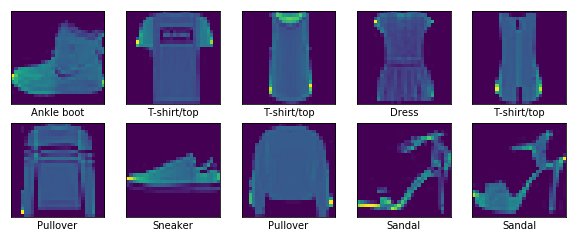

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i])
    plt.xlabel(labels[ytrain[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten())  
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [12]:
model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 294us/step - loss: 1.1142 - acc: 0.6642 - val_loss: 0.7383 - val_acc: 0.7436
Epoch 2/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.6427 - acc: 0.7799 - val_loss: 0.6079 - val_acc: 0.7808
Epoch 3/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.5576 - acc: 0.8048 - val_loss: 0.5550 - val_acc: 0.8053
Epoch 4/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.5167 - acc: 0.8169 - val_loss: 0.5273 - val_acc: 0.8141
Epoch 5/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.4915 - acc: 0.8253 - val_loss: 0.5081 - val_acc: 0.8234
Epoch 6/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.4727 - acc: 0.8330 - val_loss: 0.4932 - val_acc: 0.8278
Epoch 7/10
60000/60000 [==============================] - 15s 252us/

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [13]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Execute the model

In [14]:
model.fit(trainX, trainY, epochs=100, batch_size=600, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 106us/step - loss: 1.0682 - acc: 0.6500 - val_loss: 0.7334 - val_acc: 0.7442
Epoch 2/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.6510 - acc: 0.7776 - val_loss: 0.6257 - val_acc: 0.7781
Epoch 3/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.5799 - acc: 0.7982 - val_loss: 0.5794 - val_acc: 0.7979
Epoch 4/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.5426 - acc: 0.8101 - val_loss: 0.5511 - val_acc: 0.8066
Epoch 5/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.5165 - acc: 0.8186 - val_loss: 0.5319 - val_acc: 0.8134
Epoch 6/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.4978 - acc: 0.8245 - val_loss: 0.5170 - val_acc: 0.8181
Epoch 7/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.4824 - acc: 0.8305 - val_loss: 0.5055 -

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [15]:
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [16]:
model.fit(trainX, trainY, epochs=100, batch_size=600, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 100us/step - loss: 1.8881 - acc: 0.3699 - val_loss: 1.4306 - val_acc: 0.5350
Epoch 2/100
60000/60000 [==============================] - 4s 75us/step - loss: 1.2450 - acc: 0.6042 - val_loss: 1.1469 - val_acc: 0.6211
Epoch 3/100
60000/60000 [==============================] - 5s 77us/step - loss: 1.0474 - acc: 0.6589 - val_loss: 1.0112 - val_acc: 0.6583
Epoch 4/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.9440 - acc: 0.6881 - val_loss: 0.9277 - val_acc: 0.6817
Epoch 5/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.8782 - acc: 0.7084 - val_loss: 0.8720 - val_acc: 0.6987
Epoch 6/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.8316 - acc: 0.7212 - val_loss: 0.8316 - val_acc: 0.7098
Epoch 7/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.7962 - acc: 0.7329 - val_loss: 0.8005 -

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [21]:
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

model = Sequential()
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.03)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [22]:
model.fit(trainX, trainY, epochs=100, batch_size=600, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 134us/step - loss: 0.7455 - acc: 0.7503 - val_loss: 0.6073 - val_acc: 0.7897
Epoch 2/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.5239 - acc: 0.8186 - val_loss: 0.5504 - val_acc: 0.8078
Epoch 3/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.4842 - acc: 0.8318 - val_loss: 0.5158 - val_acc: 0.8216
Epoch 4/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.4626 - acc: 0.8388 - val_loss: 0.4935 - val_acc: 0.8309
Epoch 5/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.4482 - acc: 0.8432 - val_loss: 0.4842 - val_acc: 0.8327
Epoch 6/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.4367 - acc: 0.8470 - val_loss: 0.4749 - val_acc: 0.8366
Epoch 7/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.4278 - acc: 0.8495 - val_loss: 0.4654 -

## Review model

In [27]:
scores = model.evaluate(testX, testY)
scores[1]*100

10000/10000 [==============================] - 1s 141us/step


86.82

In [28]:
scores = model.evaluate(trainX, trainY)
scores[1]*100

60000/60000 [==============================] - 8s 125us/step


90.88000000000001